In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data['Churn'] = pd.factorize(data['Churn'])[0]

In [5]:
data.drop('TotalCharges',axis=1, inplace=True)

In [6]:
model_data = pd.get_dummies(data, drop_first = True)

In [7]:
x = model_data.drop('Churn', axis = 1)
y = model_data['Churn']

In [8]:
from sklearn.model_selection import train_test_split
# Splting Dataset Into Train And test
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
# Logistic Model
logmodel = LogisticRegression()

In [10]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
predictin = logmodel.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test, predictin))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.60      0.52      0.56       368

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [14]:
predictin1 = logmodel.predict(X_train)

In [15]:
print(classification_report(y_train, predictin1))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4133
           1       0.74      0.64      0.69      1501

    accuracy                           0.84      5634
   macro avg       0.81      0.78      0.79      5634
weighted avg       0.84      0.84      0.84      5634



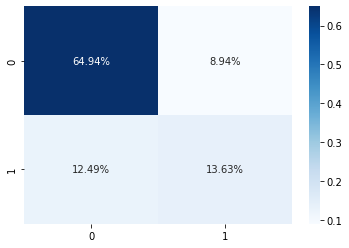

In [17]:
from sklearn.metrics import confusion_matrix
# Confistion Matrix
confusion_matrix(y_test, predictin)
LRCM = confusion_matrix(y_test, predictin)
ax = sns.heatmap(LRCM/np.sum(LRCM), annot=True, fmt='.2%', cmap='Blues')


In [17]:
from sklearn.metrics import accuracy_score
# Accuracy For Test  DataSet
accuracy_score(y_test,  predictin)

0.7856635911994322

In [18]:
accuracy_score(y_train,  predictin1)

0.8448704295349663

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

In [20]:
prob = logmodel.predict_proba(X_test)

prob_train =logmodel.predict_proba(X_train)


fpr, tpr, thershold = metrics.roc_curve(y_test, prob[:,1], pos_label=1)
fpr1, tpr2, thershold2 = metrics.roc_curve(y_train, prob_train[:,1], pos_label=1)

In [21]:
random_probs = [0 for i in range(len(y_test))]
#roc_auc = metrics.auc(fpr, tpr)

p_fpr, p_tpr , _ = roc_curve(y_test, random_probs, pos_label = 1)

p_fpr1, p_tpr1 , __ = roc_curve(y_test, random_probs, pos_label = 1)

In [22]:
auc_score = roc_auc_score(y_test, prob[:,1])
auc_score1 = roc_auc_score(y_train, prob_train[:,1])

print("Test Accuracy:",auc_score)
print("Train Accuracy:",auc_score1)

Test Accuracy: 0.8235627323225996
Train Accuracy: 0.8892095970216161


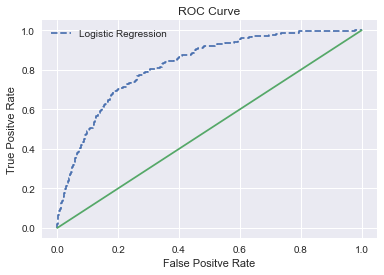

In [23]:
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--', label =  'Logistic Regression')
plt.plot(p_fpr, p_tpr)
plt.title("ROC Curve")
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.legend(loc='best')
plt.show()